In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

import warnings
warnings.simplefilter('ignore')

In [25]:
school_df = pd.read_csv('../data/cleaned_school.csv')


### Exploring racial breakdown

In [26]:
school_df['white'].mean()

12.837118932356406

In [27]:
school_df['black'].mean()

30.075821012691353

In [28]:
school_df['asian'].mean()

12.330145230930263

In [29]:
school_df['hispanic'].mean()

42.64264032447991

#### NYC Demographic Comparison:
- White: 41.33% 
- Black or African American: 23.82% 
- Asian: 14.29%
- Other race: 14.43% 


The city is also 29% Hispanic

Notice: The large distinction between NYC percent white and public school percent white... 

### Question: How do school racial demographics vary by borough?

In [30]:
school_df['borough'].describe()

count     7643
unique       5
top          K
freq      2308
Name: borough, dtype: object

<Axes: xlabel='borough'>

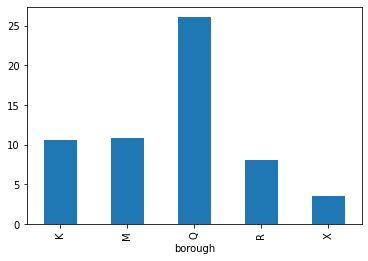

In [31]:
school_df.groupby('borough')['asian'].mean().plot(kind = 'bar')

* A quarter of queens public school students are asian

<Axes: xlabel='borough'>

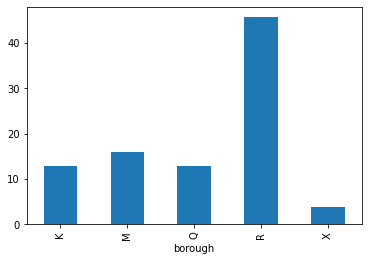

In [32]:
school_df.groupby('borough')['white'].mean().plot(kind = 'bar')

* 44% of bronx public school students are white
* this is interesting because the borough is 9% white

<Axes: xlabel='borough'>

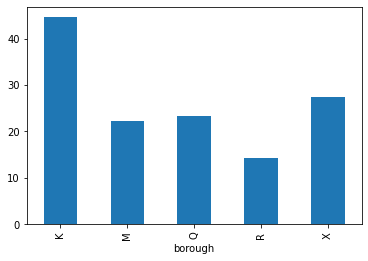

In [33]:
school_df.groupby('borough')['black'].mean().plot(kind = 'bar')

* Brooklyn public school student body is almost 50% black or African American

<Axes: xlabel='borough'>

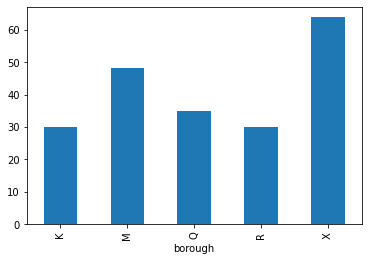

In [34]:
school_df.groupby('borough')['hispanic'].mean().plot(kind = 'bar')

* Manhattan public schools are the most hispanic by density. 

## Attempt at using geolocation data

In [35]:
schools_gdf = gpd.read_file('../data/borough_boundaries.geojson')

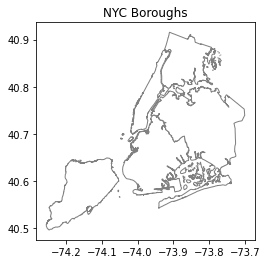

In [36]:
schools_gdf.plot(color='white', edgecolor='gray')
plt.title('NYC Boroughs')
plt.show()

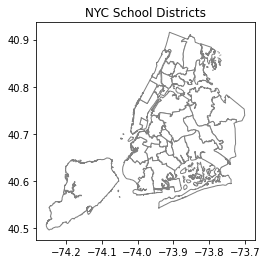

In [52]:
districts_gdf = gpd.read_file('../data/school_districts.geojson')
districts_gdf.plot(color='white', edgecolor='gray')
plt.title('NYC School Districts')
plt.show()

In [37]:
schools_gdf.columns

Index(['boro_code', 'boro_name', 'shape_area', 'shape_leng', 'geometry'], dtype='object')

## Race by district and borough

In [38]:
school_df.groupby('borough')['asian'].mean().reset_index()

,borough,asian
0,K,10.656629
1,M,10.831629
2,Q,26.088371
3,R,8.085112
4,X,3.599778


In [42]:
asian_by_borough = school_df.groupby('borough')['asian'].mean().reset_index()



In [43]:
schools_gdf_asian = schools_gdf.merge(asian_by_borough, left_on="boro_name", right_on="borough")
schools_gdf_asian

,boro_code,boro_name,shape_area,shape_leng,geometry,borough,asian
0,5,R,1623620725.06,325917.353702,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",R,8.085112
1,2,X,1187174784.85,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",X,3.599778
2,1,M,636520830.768,357564.316391,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",M,10.831629
3,3,K,1934143372.64,728197.541089,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",K,10.656629
4,4,Q,3041418506.76,888199.731579,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",Q,26.088371


### Asian

<Axes: >

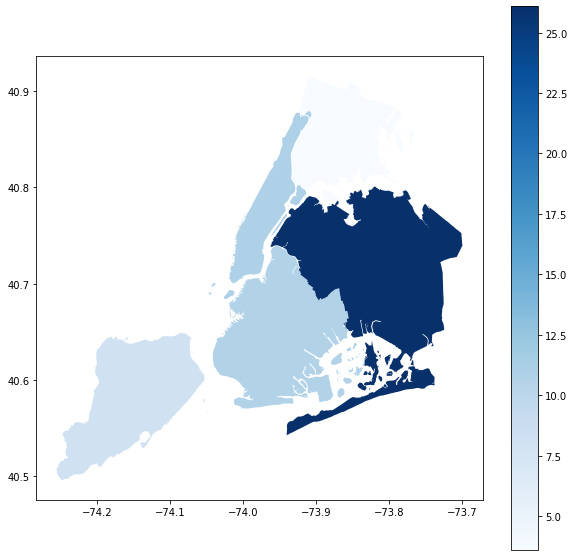

In [44]:
schools_gdf_asian.plot(column = 'asian', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

<Axes: >

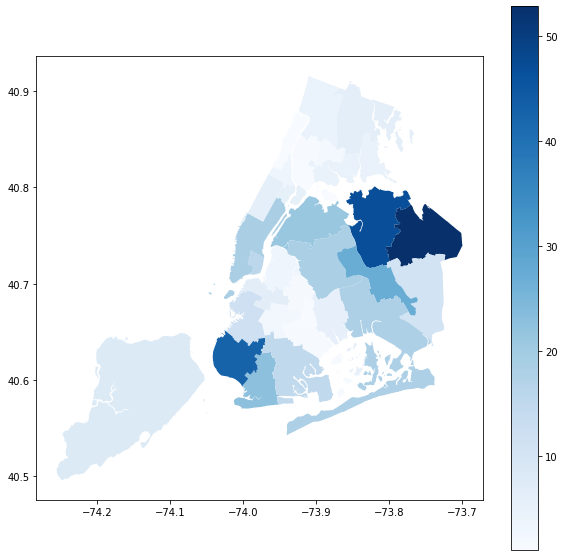

In [53]:
asian_by_district = school_df.groupby('district')['asian'].mean().reset_index()
asian_by_district['district'] = asian_by_district['district'].astype(str)
districts_gdf_asian = districts_gdf.merge(asian_by_district, left_on="school_dist", right_on="district")
districts_gdf_asian.plot(column = 'asian', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

### Black

<Axes: >

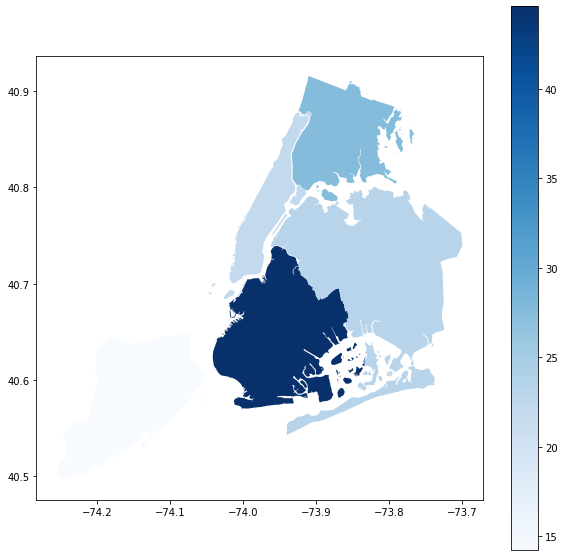

In [45]:
black_by_borough = school_df.groupby('borough')['black'].mean().reset_index()
schools_gdf_black = schools_gdf.merge(black_by_borough, left_on="boro_name", right_on="borough")

schools_gdf_black.plot(column = 'black', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

<Axes: >

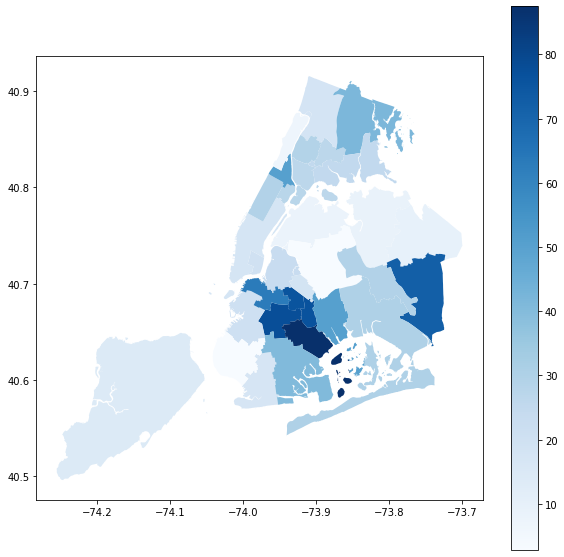

In [54]:
black_by_district = school_df.groupby('district')['black'].mean().reset_index()
black_by_district['district'] = black_by_district['district'].astype(str)
districts_gdf_black = districts_gdf.merge(black_by_district, left_on="school_dist", right_on="district")
districts_gdf_black.plot(column = 'black', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

### White

<Axes: >

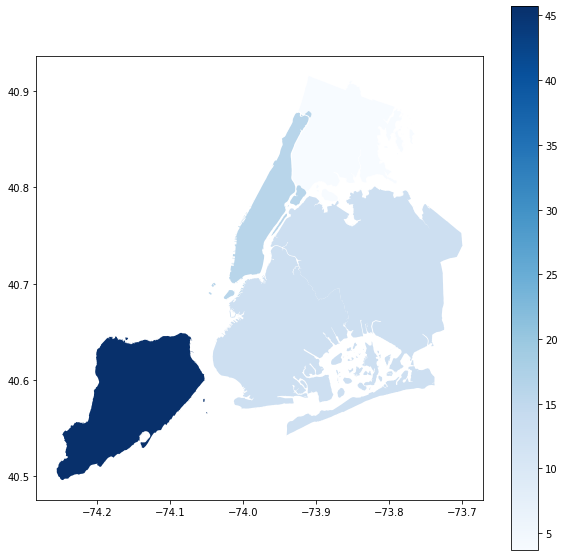

In [46]:
white_by_borough = school_df.groupby('borough')['white'].mean().reset_index()
schools_gdf_white = schools_gdf.merge(white_by_borough, left_on="boro_name", right_on="borough")

schools_gdf_white.plot(column = 'white', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

<Axes: >

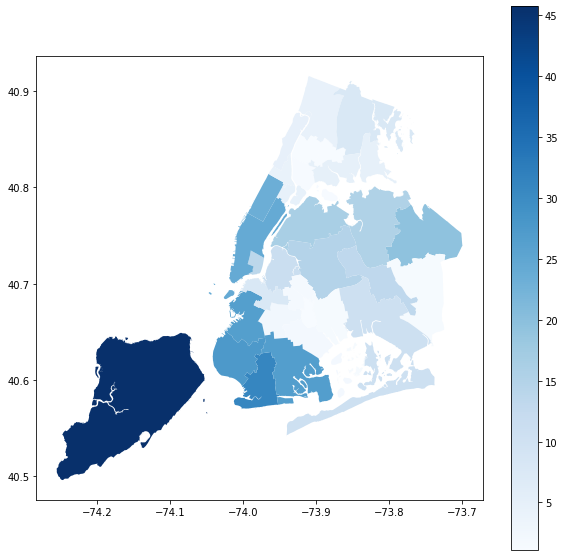

In [56]:
white_by_district = school_df.groupby('district')['white'].mean().reset_index()
white_by_district['district'] = white_by_district['district'].astype(str)
districts_gdf_white = districts_gdf.merge(white_by_district, left_on="school_dist", right_on="district")
districts_gdf_white.plot(column = 'white', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

### Hispanic

<Axes: >

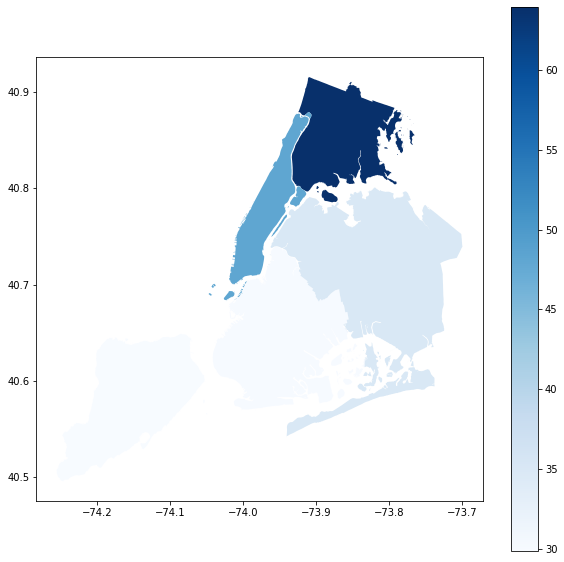

In [59]:
hispanic_by_borough = school_df.groupby('borough')['hispanic'].mean().reset_index()
schools_gdf_hispanic = schools_gdf.merge(hispanic_by_borough, left_on="boro_name", right_on="borough")

schools_gdf_hispanic.plot(column = 'hispanic', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

<Axes: >

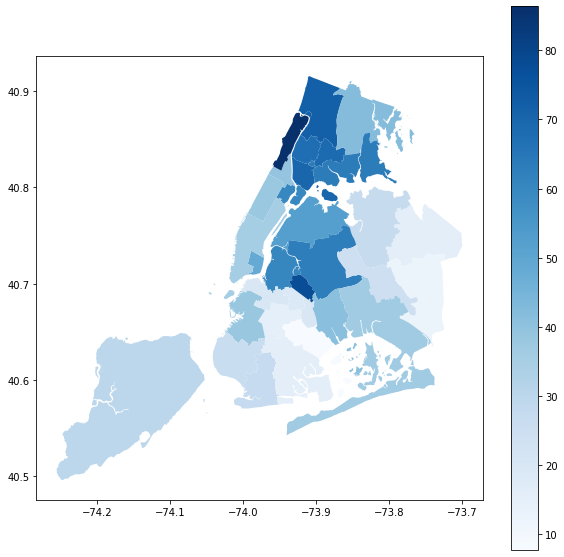

In [61]:
hispanic_by_district = school_df.groupby('district')['hispanic'].mean().reset_index()
hispanic_by_district['district'] = hispanic_by_district['district'].astype(str)
districts_gdf_hispanic = districts_gdf.merge(hispanic_by_district, left_on="school_dist", right_on="district")
districts_gdf_hispanic.plot(column = 'hispanic', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")